#CafChem Qiskit Machine Learning examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/MauricioCafiero/CafChemQuantum/blob/main/Qiskit_ML_CafChem.ipynb)

## This notebook allows you to:
- Load and import Qiskit libraries
- Load a dataset
- Perform SVC using a quantum kernel
- Create a quantum neural network and train it to classify data

## Requirements:

- Runs well on CPU

In [1]:
!pip install -q qiskit
!pip install -q qiskit_aer
!pip install -q qiskit_algorithms
!pip install -q qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 16.2 MB/s eta 0:00:00


# Support Vector Machines Classifier with Quantum Kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import copy

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import z_feature_map
from qiskit_machine_learning.algorithms import QSVC
from qiskit_aer import Aer

### Create a dataset for HMGCR inhibitors
- Features: IC50 and QED
- targets: Docking scores

In [3]:
df = pd.read_csv('/content/HMGCR_inhibitors_sample.csv')
df.head()

,IC50,QED,SMILES,MW,aLogP,HBA,HBD,RotBond,AromRings,Score
0,2.867672,0.439642,CC(C)c1c(/C=C/[C@H](O)C[C@@H](O)CC(=O)O)c(-c2c...,437.511,5.0066,4,3,9,3,-8.6
1,2.316003,0.455996,CC(C)c1cc(-c2cnccc2)c(-c2ccc(F)cc2)n1/C=C/[C@@...,438.499,4.5369,5,3,9,3,-8.3
2,338.281620,0.663514,CC(C)c1cc(-c2ccccc2)cc(/C=C/[C@@H](O)C[C@@H](O...,369.437,3.1504,5,3,8,2,-7.6
3,1.480216,0.400421,CC(C)c1nc(N(C)S(C)(=O)=O)nc(-c2ccc(F)cc2)c1/C=...,577.625,5.0383,7,1,8,3,-8.6
4,1.367730,0.150749,CC(C)c1nc(N(C)S(C)(=O)=O)nc(-c2ccc(F)cc2)c1/C=...,679.805,8.0642,6,0,12,4,-10.0


In [4]:
df2 = df.iloc[:10,:]
df.head()

,IC50,QED,SMILES,MW,aLogP,HBA,HBD,RotBond,AromRings,Score
0,2.867672,0.439642,CC(C)c1c(/C=C/[C@H](O)C[C@@H](O)CC(=O)O)c(-c2c...,437.511,5.0066,4,3,9,3,-8.6
1,2.316003,0.455996,CC(C)c1cc(-c2cnccc2)c(-c2ccc(F)cc2)n1/C=C/[C@@...,438.499,4.5369,5,3,9,3,-8.3
2,338.281620,0.663514,CC(C)c1cc(-c2ccccc2)cc(/C=C/[C@@H](O)C[C@@H](O...,369.437,3.1504,5,3,8,2,-7.6
3,1.480216,0.400421,CC(C)c1nc(N(C)S(C)(=O)=O)nc(-c2ccc(F)cc2)c1/C=...,577.625,5.0383,7,1,8,3,-8.6
4,1.367730,0.150749,CC(C)c1nc(N(C)S(C)(=O)=O)nc(-c2ccc(F)cc2)c1/C=...,679.805,8.0642,6,0,12,4,-10.0


In [5]:
X = df2[['IC50', 'QED']].values
y_float = df2['Score'].values

In [6]:
y = []
for val in y_float:
  if val < -8.0:
    y.append(1)
  else:
    y.append(0)

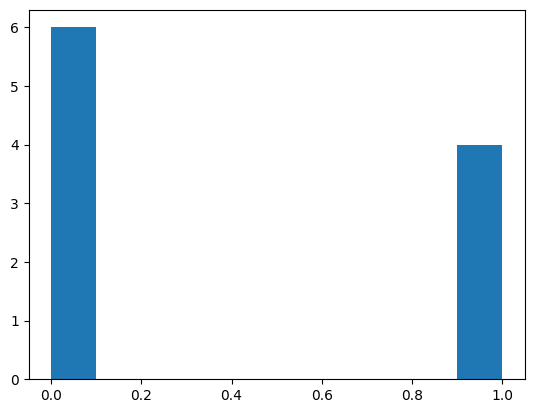

In [7]:
plt.hist(y)
plt.show()

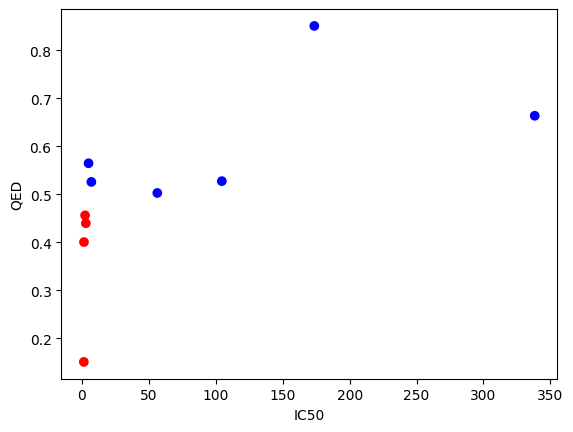

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.xlabel('IC50')
plt.ylabel('QED')
plt.show()


### Create a Quantum SVC kernel and fit the data

In [9]:
feature_map = z_feature_map(feature_dimension=2, reps=15, entanglement='full')
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

qsvc = QSVC(quantum_kernel=quantum_kernel, C = 1.0, degree=1, max_iter = -1)


In [10]:
qsvc.fit(X,y)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=1, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x785fc237bc20>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [11]:
score = qsvc.score(X,y)
print(f"Accuracy: {score:.2f}")

Accuracy: 1.00


In [12]:
preds = qsvc.predict(X)

for truth, pred in zip(y, preds):
  print(f"Truth: {truth}, Prediction: {pred}")

Truth: 1, Prediction: 1
Truth: 1, Prediction: 1
Truth: 0, Prediction: 0
Truth: 1, Prediction: 1
Truth: 1, Prediction: 1
Truth: 0, Prediction: 0
Truth: 0, Prediction: 0
Truth: 0, Prediction: 0
Truth: 0, Prediction: 0
Truth: 0, Prediction: 0


### Compare with classical SVC

In [13]:
svm_classical = SVC(kernel='linear')
svm_classical.fit(X,y)

SVC(kernel='linear')

In [14]:
score = svm_classical.score(X,y)
print(f"Accuracy: {score:.2f}")

Accuracy: 1.00


## Quantum Neural Network

In [15]:
from qiskit_aer.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector

In [76]:
class qnn():
  '''
  Quantum Neural Network
  Args:
    num_feat = number of features in the dataset
    X: features
    y: targets
    C: number of classical registers
    shots: number of shots
  '''
  def __init__(self, num_feat: int,  X: np.array, y: np.array, C_param: int, shots: int = 1000):
    self.num_feat = num_feat
    self.X = X
    self.y = y
    self.C_param = C_param
    self.shots = shots
    self.simulator = Aer.get_backend('qasm_simulator')

  def feature_map(self, datapoint_idx: int):
    '''
    Feature map for the quantum circuit
    Args:
      datapoint_idx: index of the datapoint in the dataset
    '''
    self.q = QuantumRegister(self.num_feat)
    self.c = ClassicalRegister(self.C_param)
    qc = QuantumCircuit(self.q,self.c)

    for i, x in enumerate(self.X[datapoint_idx]):
      qc.rx(x,i)

    return qc

  def variational_circuit(self, qc: QuantumCircuit, theta: np.array):
    '''
    Variational circuit for the quantum circuit
    Args:
      qc: quantum circuit
      theta: rotation angle parameter
    '''
    for i in range(self.num_feat-1):
        qc.cx(i,i+1)
    qc.cx(self.num_feat-1,0)

    # Rotation angle parameter
    for i in range(self.num_feat):
        qc.ry(theta[i],i)

    return qc

  def qnn_pass(self, datapoint_idx: int, theta: np.array):
    '''
    Quantum neural network pass
    Args:
      datapoint_idx: index of the datapoint in the dataset
      theta: rotation angle parameter
    '''
    qc = self.feature_map(datapoint_idx)

    qc.barrier()
    qc = self.variational_circuit(qc, theta)
    qc.barrier()
    qc.measure(0,self.c)

    job = self.simulator.run(qc, shots=self.shots)

    result = job.result()
    counts = result.get_counts(qc)
    result = np.argmax(list(counts.values()))

    return qc, result

  def loss(self, pred: int, truth: int):
    '''
    Loss function
    '''
    return (pred - truth)**2

  def gradient(self, datapoint_idx: int, theta: np.array):
    '''
    Gradient of the loss function
    '''
    delta = 0.01
    grad = []
    dtheta = copy.copy(theta)
    for i in range(len(theta)):
      dtheta[i] += delta

      _, predict1 = self.qnn_pass(datapoint_idx, dtheta)
      _, predict2 = self.qnn_pass(datapoint_idx, theta)
      #print(predict1, predict2)
      # Finite difference
      grad.append( (self.loss(predict1,y[datapoint_idx]) - self.loss(predict2,y[datapoint_idx])) / delta )

    grad = np.array(grad)
    return grad

  def accuracy(self, datapoint_idx, theta):
    '''
    Accuracy of the quantum neural network
    '''
    counter = 0
    for datapoint_idx in range(len(y)):
        _, prediction = self.qnn_pass(datapoint_idx, theta)
        if prediction == y[datapoint_idx]:
            counter += 1
    return (counter/len(y))

In [77]:
epoch = 30
eta = 0.05
loss_list = []
theta = np.random.rand(2)

test_qnn = qnn(2, X, y, 1)

print(f'Epoch \t Loss \t Accuracy \t Theta')
for i in range(epoch):
    loss_tmp = []
    for datapoint_idx in range(len(y)):
        _, prediction = test_qnn.qnn_pass(datapoint_idx, theta)
        loss_tmp.append(test_qnn.loss(prediction, y[datapoint_idx]))

        # Update theta
        theta = theta - eta*test_qnn.gradient(datapoint_idx, theta)

    loss_list.append(np.mean(loss_tmp))
    acc = test_qnn.accuracy(datapoint_idx, theta)

    print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f} \t {theta}')

    if acc >= 0.8:
      break

Epoch 	 Loss 	 Accuracy 	 Theta
0 	 0.600 	 0.400 	 [ 0.03232043 -4.02394976]
1 	 0.500 	 0.500 	 [ 0.03232043 -9.02394976]
2 	 0.600 	 0.400 	 [0.03232043 0.97605024]
3 	 0.700 	 0.500 	 [ 0.03232043 -4.02394976]
4 	 0.600 	 0.500 	 [ 5.03232043 -9.02394976]
5 	 0.600 	 0.400 	 [ 15.03232043 -14.02394976]
6 	 0.600 	 0.500 	 [ 10.03232043 -24.02394976]
7 	 0.600 	 0.400 	 [ 15.03232043 -24.02394976]
8 	 0.600 	 0.400 	 [ 25.03232043 -19.02394976]
9 	 0.600 	 0.500 	 [ 25.03232043 -24.02394976]
10 	 0.400 	 0.600 	 [ 25.03232043 -29.02394976]
11 	 0.600 	 0.400 	 [ 35.03232043 -34.02394976]
12 	 0.300 	 0.400 	 [ 45.03232043 -59.02394976]
13 	 0.500 	 0.300 	 [ 40.03232043 -44.02394976]
14 	 0.600 	 0.400 	 [ 40.03232043 -59.02394976]
15 	 0.500 	 0.300 	 [ 40.03232043 -69.02394976]
16 	 0.700 	 0.800 	 [ 30.03232043 -64.02394976]
